In [12]:
# -*- encoding:utf-8 -*-

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats
from yellowbrick.classifier import ConfusionMatrix

In [13]:
#Carregando o dataset e pegando os previsores e classe
iris = datasets.load_iris()
previsores = iris.data
classe = iris.target

In [14]:
#Vendo algumas caracteristicas estatísticas da base
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [15]:
#Ajustando o dados de treinamento e validação/teste (random_state = 0 garante o mesmo resultado da base ao rodar)
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [16]:
#Treinando e gerando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_treinamento, y_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
#Fazendo as previsões
previsoes = knn.predict(x_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto

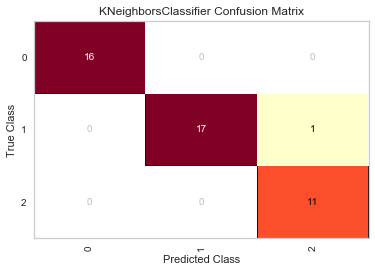

In [19]:
#Visualizando melhor os resultados com yellowbricks
v = ConfusionMatrix(KNeighborsClassifier())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [20]:
taxa_acerto

0.9777777777777777

In [21]:
taxa_erro

0.022222222222222254